In [5]:
import os
import pandas as pd

# Removing Null values

In [6]:
input_path = os.path.join('..', "data", "PSLM_2020")
output_path = os.path.join(input_path, "null_removed_files")

In [7]:
# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(input_path):
    filepath = os.path.join(input_path, filename)
    try:
        df = pd.read_csv(filepath)
    except:
        print(f"Skipping file: {filename}")
        continue

    # Store original shape for comparison
    original_shape = df.shape

    df.fillna(0, inplace=True)

    output_filename = os.path.join(output_path, filename)
    df.to_csv(output_filename, index=False)
    
    print(output_filename)
    # Read the saved file back to ensure dimensions match
    saved_df = pd.read_csv(output_filename)
    saved_shape = saved_df.shape
    
    if original_shape == saved_shape:
        print(f"{filename} processed and saved successfully. Dimensions match.")
    else:
        print(f"Warning: Dimensions mismatch for {filename}!")
        print(f"Original shape: {original_shape}")
        print(f"Saved shape: {saved_shape}")


Skipping file: info.dta
Skipping file: null_removed_files
..\data\PSLM_2020\null_removed_files\sece.csv
sece.csv processed and saved successfully. Dimensions match.
Skipping file: sece.dta


# Aggregating the Income.csv file

In [8]:
file_path = os.path.join(output_path, 'sece.csv')
income = pd.read_csv(file_path)

In [9]:
income.sample(50)

,hhcode,psu,province,region,district,idc,seaq01,seaq02,seaq03,seaq04,...,seaq17,seaq18,seaq19,seaq20,seaq21,seaq22,seaq23,seaq24,seaq25,seaq26
172092,206100607,2061006,2,1,206,7,2.0,0.0,3.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
244414,214103913,2141039,2,1,214,5,2.0,0.0,3.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
407362,233103429,2331034,2,1,233,5,2.0,0.0,3.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
277896,218204610,2182046,2,2,218,7,2.0,0.0,2.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
457089,303103920,3031039,3,1,303,3,2.0,0.0,3.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
39291,110200206,1102002,1,2,110,2,2.0,0.0,3.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
6012,102101323,1021013,1,1,102,7,2.0,0.0,3.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
53846,114104907,1141049,1,1,114,4,1.0,20.0,0.0,6320.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
96755,125102129,1251021,1,1,125,10,2.0,0.0,3.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0
263762,216104423,2161044,2,1,216,6,2.0,0.0,2.0,0.0,...,0.0,2,0.0,2,0.0,3,0.0,0.0,0.0,0.0


## Selecting the relevant columns

In [10]:
income.columns

Index(['hhcode', 'psu', 'province', 'region', 'district', 'idc', 'seaq01',
       'seaq02', 'seaq03', 'seaq04', 'seaq05', 'seaq06', 'seaq07', 'seaq08',
       'seaq09', 'seaq10', 'seaq11', 'seaq12', 'seaq13', 'seaq14', 'seaq15',
       'seaq16', 'seaq17', 'seaq18', 'seaq19', 'seaq20', 'seaq21', 'seaq22',
       'seaq23', 'seaq24', 'seaq25', 'seaq26'],
      dtype='object')

In [11]:
renamed_cols = {'seaq08': 'monthly_income', 'seaq10': 'annual_income', 'seaq15': '2nd_income_annual', 'seaq17': '3rd_income_annual', 'seaq19': '4th_income_annual', 'seaq21': "pension_annual", 'seaq23': 'remittance_within_country_annual', 'seaq24': 'remittance_outside_country_annual', 'seaq25': 'rent_income', }

In [12]:
income.rename(columns=renamed_cols, inplace=True)

In [13]:
income.columns

Index(['hhcode', 'psu', 'province', 'region', 'district', 'idc', 'seaq01',
       'seaq02', 'seaq03', 'seaq04', 'seaq05', 'seaq06', 'seaq07',
       'monthly_income', 'seaq09', 'annual_income', 'seaq11', 'seaq12',
       'seaq13', 'seaq14', '2nd_income_annual', 'seaq16', '3rd_income_annual',
       'seaq18', '4th_income_annual', 'seaq20', 'pension_annual', 'seaq22',
       'remittance_within_country_annual', 'remittance_outside_country_annual',
       'rent_income', 'seaq26'],
      dtype='object')

In [14]:
payment_cols = income[['hhcode', 'district'] + list(renamed_cols.values())]

In [15]:
payment_cols.head(20)

,hhcode,district,monthly_income,annual_income,2nd_income_annual,3rd_income_annual,4th_income_annual,pension_annual,remittance_within_country_annual,remittance_outside_country_annual,rent_income
0,101100101,101,0.0,250000.0,160000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101100101,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101100101,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101100101,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101100101,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,101100101,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,101100102,101,240000.0,0.0,0.0,0.0,0.0,150000.0,450000.0,0.0,0.0
7,101100102,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,101100102,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,101100102,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Aggregate the data based on "hhcode" using sum()
aggregated_pay_cols = payment_cols.drop('district', axis=1).groupby('hhcode').sum().reset_index()
# Get the count of members in each household
household_members = payment_cols.groupby('hhcode').size().reset_index(name='members')
# Merging the dataframes
aggregated_pay_cols = pd.merge(aggregated_pay_cols, household_members, on='hhcode')

In [17]:
aggregated_pay_cols.head(20)

,hhcode,monthly_income,annual_income,2nd_income_annual,3rd_income_annual,4th_income_annual,pension_annual,remittance_within_country_annual,remittance_outside_country_annual,rent_income,members
0,101100101,0.0,250000.0,160000.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,101100102,240000.0,0.0,0.0,0.0,0.0,150000.0,450000.0,0.0,0.0,6
2,101100103,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,101100104,18000.0,0.0,240000.0,0.0,0.0,0.0,60000.0,0.0,0.0,2
4,101100105,18000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5,101100106,0.0,0.0,0.0,0.0,0.0,0.0,200000.0,0.0,0.0,5
6,101100107,0.0,150000.0,0.0,0.0,0.0,720000.0,0.0,0.0,0.0,4
7,101100108,18000.0,180000.0,0.0,0.0,0.0,0.0,400000.0,0.0,0.0,8
8,101100109,40000.0,180000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,101100110,15000.0,0.0,0.0,0.0,0.0,0.0,500000.0,0.0,0.0,5


### Filling the "Annual_Income" based on "Monthly_Income" * 12

In [18]:
aggregated_pay_cols.loc[aggregated_pay_cols["annual_income"] == 0, "annual_income"] = aggregated_pay_cols["monthly_income"] * 12

Aggregating all the annual incomes into a single attribute, representing the overall annual income. Then, updating the monthly income based on this annual income.

In [19]:
aggregated_pay_cols.columns

Index(['hhcode', 'monthly_income', 'annual_income', '2nd_income_annual',
       '3rd_income_annual', '4th_income_annual', 'pension_annual',
       'remittance_within_country_annual', 'remittance_outside_country_annual',
       'rent_income', 'members'],
      dtype='object')

In [20]:
income_columns = [
    'annual_income', '2nd_income_annual', '3rd_income_annual',
    '4th_income_annual', 'pension_annual', 'rent_income',
    'remittance_within_country_annual', 'remittance_outside_country_annual',
]

# Calculate the total annual income except the monthly one
aggregated_pay_cols["Total_Annual_Income"] = aggregated_pay_cols[income_columns].sum(axis=1)

In [21]:
aggregated_pay_cols[["Total_Annual_Income"]+income_columns+['hhcode']]

,Total_Annual_Income,annual_income,2nd_income_annual,3rd_income_annual,4th_income_annual,pension_annual,rent_income,remittance_within_country_annual,remittance_outside_country_annual,hhcode
0,410000.0,250000.0,160000.0,0.0,0.0,0.0,0.0,0.0,0.0,101100101
1,3480000.0,2880000.0,0.0,0.0,0.0,150000.0,0.0,450000.0,0.0,101100102
2,300000.0,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101100103
3,516000.0,216000.0,240000.0,0.0,0.0,0.0,0.0,60000.0,0.0,101100104
4,216000.0,216000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101100105
...,...,...,...,...,...,...,...,...,...,...
160649,1440000.0,1440000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433200123
160650,500000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433200124
160651,792000.0,792000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433200125
160652,480000.0,480000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433200126


In [22]:
finalized_income_df = aggregated_pay_cols.drop(income_columns+['monthly_income'], axis=1)

In [23]:
finalized_income_df.columns

Index(['hhcode', 'members', 'Total_Annual_Income'], dtype='object')

In [24]:
finalized_income_df["Avg_Daily_Income_Per_Person"] = ((aggregated_pay_cols["Total_Annual_Income"] / 12) / 30) / aggregated_pay_cols['members']

Decoding Districts

In [25]:
path1 = os.path.join('..', 'data', 'PSLM_2020', 'info.dta')
reader_1 = pd.read_stata(path1)[['hhcode', 'district']]

In [26]:
finalized_df = pd.merge(reader_1, finalized_income_df, on='hhcode').reset_index(drop=True)

In [27]:
finalized_df.head(20)

,hhcode,district,members,Total_Annual_Income,Avg_Daily_Income_Per_Person
0,101100101,abbottabad,6,410000.0,189.814815
1,101100102,abbottabad,6,3480000.0,1611.111111
2,101100103,abbottabad,2,300000.0,416.666667
3,101100104,abbottabad,2,516000.0,716.666667
4,101100105,abbottabad,3,216000.0,200.000000
5,101100106,abbottabad,5,200000.0,111.111111
6,101100107,abbottabad,4,870000.0,604.166667
7,101100108,abbottabad,8,580000.0,201.388889
8,101100109,abbottabad,5,180000.0,100.000000
9,101100110,abbottabad,5,680000.0,377.777778


In [28]:
input_path

'..\\data\\PSLM_2020'

In [29]:
processed_data_path = os.path.join('..', 'data', 'processed')
processed_data_path

'..\\data\\processed'

In [30]:
# Saving the column
os.makedirs(processed_data_path, exist_ok=True)
output_filename = os.path.join(processed_data_path, 'Income.csv')
finalized_df.to_csv(output_filename, index=False)
print('Income.csv Data Saved successfully !')

Income.csv Data Saved successfully !


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df = finalized_df.copy()

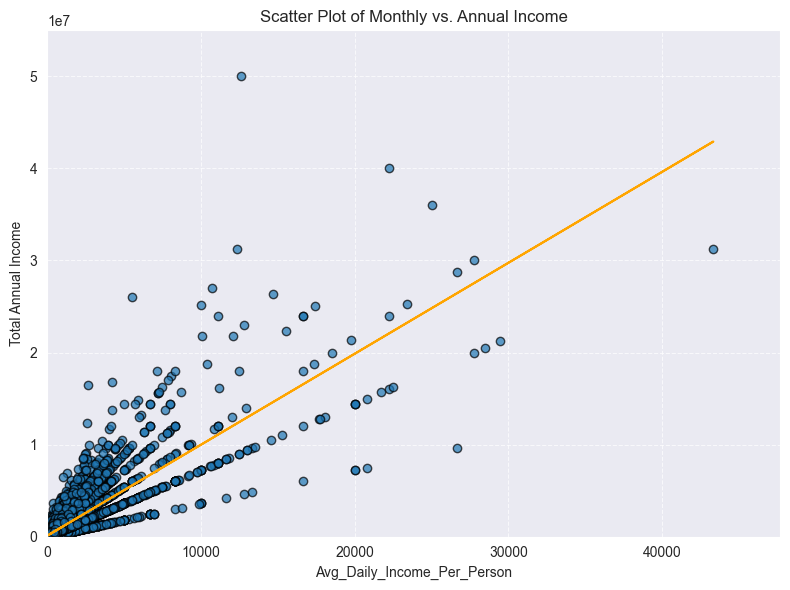

In [33]:
# Plot the scatter chart
plt.figure(figsize=(8, 6))
plt.scatter(df["Avg_Daily_Income_Per_Person"], df["Total_Annual_Income"], alpha=0.7, edgecolor="k")
plt.xlabel("Avg_Daily_Income_Per_Person")
plt.ylabel("Total Annual Income")
plt.title("Scatter Plot of Monthly vs. Annual Income")

# Add trend line (optional)
m, b = np.polyfit(df["Avg_Daily_Income_Per_Person"], df["Total_Annual_Income"], 1)
plt.plot(df["Avg_Daily_Income_Per_Person"], m * df["Avg_Daily_Income_Per_Person"] + b, color="orange", linestyle="-")

# Customize plot 
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(min(df["Avg_Daily_Income_Per_Person"]), max(df["Avg_Daily_Income_Per_Person"]) * 1.1)
plt.ylim(min(df["Total_Annual_Income"]), max(df["Total_Annual_Income"]) * 1.1)
plt.tight_layout()
plt.show()

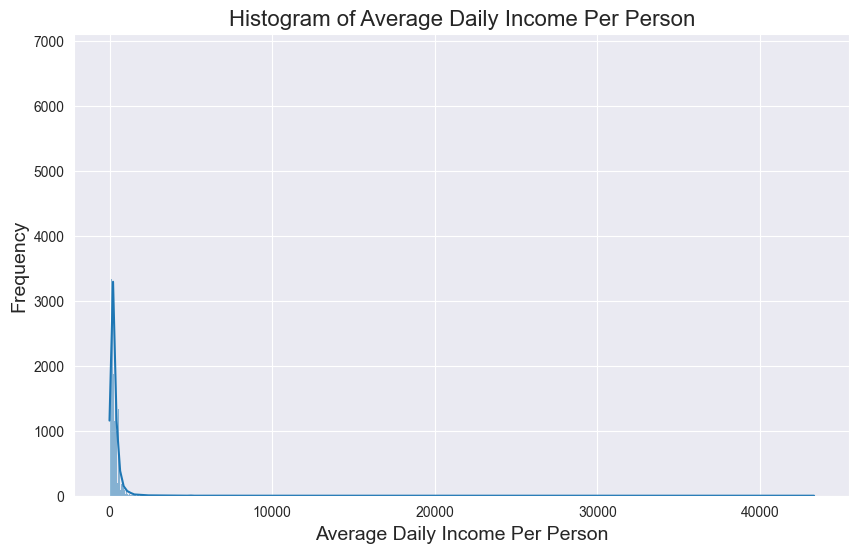

In [34]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram using Seaborn
sns.histplot(data=df, x="Avg_Daily_Income_Per_Person", kde=True, ax=ax)

# Add title and labels
plt.title("Histogram of Average Daily Income Per Person", fontsize=16)
plt.xlabel("Average Daily Income Per Person", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

# Adding district Coordinates 

In [37]:
import os
import json
import pandas as pd
from tqdm.notebook import tqdm

In [38]:
coords_file_path = os.path.join('..', 'data', 'geocode_info', 'district_coordinates.json')
with open(coords_file_path, 'r') as file:
    dist_coords = json.load(file)

dist_coords

{'abbottabad': [34.13583333, 73.18111111],
 'attock': [33.76694444, 72.36055556],
 'awaran': [26.14527778, 65.46805556],
 'badin': [24.68361111, 68.71333333],
 'bahawalnagar': [30.00055556, 73.25472222],
 'bahawalpur': [29.34138889, 71.68277778],
 'bajur': [34.79277778, 71.52333333],
 'bannu': [32.93333333, 70.66777778],
 'barkhan': [29.91361111, 69.57333333],
 'batagram': [34.77277778, 73.13416667],
 'bhakhar': [31.88833333, 71.37888889],
 'bunair': [34.40027778, 72.61361111],
 'chakwal': [32.84305556, 72.61],
 'charsada': [34.22083333, 71.71416667],
 'chiniot': [31.63861111, 72.80194444],
 'chitral': [36.12194444, 72.13527778],
 'd. g. khan': [30.33638889, 70.24],
 'd. i. khan': [31.75444444, 70.61777778],
 'dadu': [26.65583333, 67.56861111],
 'dera bugti': [29.07638889, 69.08777778],
 'duki': [30.14888889, 68.58416667],
 'faisalabad': [31.45527778, 73.13472222],
 'ghotki': [27.78333333, 69.56444444],
 'gujranwala': [32.16805556, 74.12055556],
 'gujrat': [32.66805556, 74.16472222],
 

In [39]:
file_path = os.path.join('..', 'data', 'processed', 'Income.csv')
df = pd.read_csv(file_path)
df.sample(10)

,hhcode,district,members,Total_Annual_Income,Avg_Daily_Income_Per_Person
55382,213102129,jehlum,1,0.0,0.000000
78769,224101208,muzaffar garh,8,100000.0,34.722222
83225,226101508,narowal,4,258000.0,179.166667
24874,128102128,swabi,2,120000.0,166.666667
18907,122102205,north waziristan,3,120000.0,111.111111
81118,224109113,muzaffar garh,5,380000.0,211.111111
139710,323102315,sujawal,5,264000.0,146.666667
151274,414100809,khuzdar,7,500000.0,198.412698
76651,223105823,multan,4,100000.0,69.444444
74409,222103130,mianwali,2,420000.0,583.333333


Update the dataframe with latitude and longitude values from the JSON

In [40]:
for index, row in tqdm(df.iterrows()):
    district = row['district']
    if district in dist_coords:
        df.at[index, 'latitude'] = dist_coords[district][0]
        df.at[index, 'longitude'] = dist_coords[district][1]

0it [00:00, ?it/s]

In [41]:
df.sample(20)

,hhcode,district,members,Total_Annual_Income,Avg_Daily_Income_Per_Person,latitude,longitude
133313,318100715,nowshero feroze,2,585000.0,812.500000,26.823056,68.045556
130257,315101507,larkana,2,160000.0,222.222222,27.558056,68.202500
34146,203104507,bahawalpur,2,90000.0,125.000000,29.341389,71.682778
158926,429100216,sibbi,2,264000.0,366.666667,29.662778,68.045000
11928,114104316,kohistan,4,360000.0,250.000000,35.276944,73.274722
113837,304206706,hyderabad,4,216000.0,150.000000,25.306389,68.475833
92926,231105516,rawalpindi,5,360000.0,200.000000,33.480000,73.369167
73749,222100905,mianwali,4,1394000.0,968.055556,32.688333,71.472500
45444,208202528,faisalabad,7,96000.0,38.095238,31.455278,73.134722
1154,102100603,bajur,8,715000.0,248.263889,34.792778,71.523333


In [ ]:
df.head(10)

,hhcode,district,members,Total_Annual_Income,Avg_Daily_Income_Per_Person,latitude,longitude
0,101100101,abbottabad,6,410000.0,189.814815,34.135833,73.181111
1,101100102,abbottabad,6,3480000.0,1611.111111,34.135833,73.181111
2,101100103,abbottabad,2,300000.0,416.666667,34.135833,73.181111
3,101100104,abbottabad,2,516000.0,716.666667,34.135833,73.181111
4,101100105,abbottabad,3,216000.0,200.000000,34.135833,73.181111
5,101100106,abbottabad,5,200000.0,111.111111,34.135833,73.181111
6,101100107,abbottabad,4,870000.0,604.166667,34.135833,73.181111
7,101100108,abbottabad,8,580000.0,201.388889,34.135833,73.181111
8,101100109,abbottabad,5,180000.0,100.000000,34.135833,73.181111
9,101100110,abbottabad,5,680000.0,377.777778,34.135833,73.181111


In [43]:
processed_data_path = os.path.join('..', 'data', 'processed')
processed_data_path

'..\\data\\processed'

In [44]:
# Saving the column
os.makedirs(processed_data_path, exist_ok=True)
output_filename = os.path.join(processed_data_path, 'geo_encoded_districts_df.csv')
df.to_csv(output_filename, index=False)
print('Data Saved successfully !')

Data Saved successfully !


# Testing on Gujranwala District


In [111]:
import os
import pandas as pd

In [112]:
file_path = os.path.join('..', 'data', 'processed', 'geo_encoded_districts_df.csv')
df = pd.read_csv(file_path)
df.sample(10)

,hhcode,district,members,Total_Annual_Income,Avg_Daily_Income_Per_Person,latitude,longitude
50719,210102610,gujrat,4,384000.0,266.666667,32.668056,74.164722
76452,223105202,multan,6,360000.0,166.666667,30.160833,71.523333
74570,222103714,mianwali,1,890000.0,2472.222222,32.688333,71.472500
105019,235202019,sialkot,8,1670000.0,579.861111,32.390833,74.497222
35397,203200428,bahawalpur,6,804000.0,372.222222,29.341389,71.682778
19410,123101222,nowshera,7,348000.0,138.095238,34.010833,71.987222
47148,209100713,gujranwala,5,144000.0,80.000000,32.168056,74.120556
142942,327101326,tharparkar,4,120000.0,83.333333,24.898611,70.232500
124056,311201430,karachi west,4,180000.0,125.000000,24.977500,66.948611
48535,209200226,gujranwala,2,240000.0,333.333333,32.168056,74.120556


In [113]:
grw_dist = df[df['district'] == 'gujranwala'].reset_index().drop('index', axis=1)
grw_coords = [grw_dist.latitude, grw_dist.longitude, 'gujranwala']

In [114]:
grw_dist.shape

(3059, 7)

In [115]:
grw_dist = grw_dist[grw_dist['Avg_Daily_Income_Per_Person'] != 0].reset_index(drop=True)

In [116]:
grw_dist.shape

(3005, 7)

In [117]:
outliers = grw_dist[grw_dist['Avg_Daily_Income_Per_Person'] > grw_dist['Avg_Daily_Income_Per_Person'].quantile(0.75) + 1.5 * (grw_dist['Avg_Daily_Income_Per_Person'].quantile(0.75) - grw_dist['Avg_Daily_Income_Per_Person'].quantile(0.25))]

In [118]:
print('Total Number of outliers:', len(outliers))

Total Number of outliers: 194


## Aggregating 15 rows as per cluster.

In [119]:
grw_dist = grw_dist.sort_values(by=['hhcode'])

In [120]:
# Specify the size of each group (e.g., 15 rows)
group_size = 15

# Split the dataframe into groups of maximum size group_size
groups = [grw_dist.iloc[i:i+group_size] for i in range(0, len(grw_dist), group_size)]

# Create a new column 'Group' to identify which group each row belongs to
grw_dist['Group'] = [i+1 for i in range(len(groups)) for _ in range(len(groups[i]))]

In [121]:
income_df = grw_dist[['Avg_Daily_Income_Per_Person', 'Group', 'district']]

In [122]:
# Group by 'Group' and aggregate the 'Total_Annual_Income' column
result_df = income_df.groupby(['Group', 'district'])['Avg_Daily_Income_Per_Person'].sum().reset_index()

In [123]:
result_df

,Group,district,Avg_Daily_Income_Per_Person
0,1,gujranwala,4897.857143
1,2,gujranwala,4099.682540
2,3,gujranwala,3666.973545
3,4,gujranwala,4736.049383
4,5,gujranwala,3545.476190
...,...,...,...
196,197,gujranwala,4872.208995
197,198,gujranwala,5327.839506
198,199,gujranwala,4382.539683
199,200,gujranwala,4006.084656


In [124]:
# Checking
result_df.iloc[0, 2], grw_dist.iloc[:15, ]['Avg_Daily_Income_Per_Person'].sum()

(4897.857142857143, 4897.857142857143)

In [125]:
# Calculate income_per_cluster by dividing by the group size
result_df['income_per_cluster'] = result_df['Avg_Daily_Income_Per_Person'].values / [len(group) for group in groups]

In [126]:
result_df = result_df.drop(['Avg_Daily_Income_Per_Person', 'Group'], axis=1)
result_df['dist_lat'] = grw_coords[0]
result_df['dist_long'] = grw_coords[1]

In [127]:
result_df

,district,income_per_cluster,dist_lat,dist_long
0,gujranwala,326.523810,32.168056,74.120556
1,gujranwala,273.312169,32.168056,74.120556
2,gujranwala,244.464903,32.168056,74.120556
3,gujranwala,315.736626,32.168056,74.120556
4,gujranwala,236.365079,32.168056,74.120556
...,...,...,...,...
196,gujranwala,324.813933,32.168056,74.120556
197,gujranwala,355.189300,32.168056,74.120556
198,gujranwala,292.169312,32.168056,74.120556
199,gujranwala,267.072310,32.168056,74.120556


In [128]:
result_df.shape

(201, 4)

In [129]:
file_save_path = os.path.join('..', 'data', 'processed', 'grw_scaled_encoded_df.csv')
result_df.to_csv(file_save_path, index=False)
print('Data saved successfully !!')

Data saved successfully !!


# THE END !